In [1]:
import pandas as pd
import numpy as np

In [12]:
molecule_content_df = pd.read_feather('../../../data/local/molecule/full/content/1_processed.feather')
molecule_food_df = pd.read_feather('../../../data/local/molecule/full/food/1_processed.feather')
molecule_compound_df = pd.read_feather('../../../data/local/molecule/full/compound/0.feather')
recipe_ingredients_df = pd.read_feather('../../../data/local/recipe/partial/ingredients/0.feather')
recipe_df = pd.read_feather('../../../data/local/recipe/partial/recipe/0.feather')
ingredient_concentrations_df = pd.read_feather('../../../data/local/molecule/partial/compounds/0.feather')
weight_ratios_df = pd.read_feather('../../../data/local/density/partial/weights/0.feather')

In [13]:
ingredient_concentrations_df.shape, weight_ratios_df.shape

((2450, 1357), (2443, 1))

In [14]:
ingredient_concentrations_df = ingredient_concentrations_df.loc[weight_ratios_df.index]
weight_ratios_df = weight_ratios_df.loc[ingredient_concentrations_df.index]

# Dataset Format

Now we are at the stage of being able to join the data on its molecules and get the concentration of each element for each ingredient in the recipe.

How exactly would be best to format this?

### Strategy 

Lets start with the most simple dataset - only using the compounds for which we have given concentrations of. Before implementing this we can have a think how 'if present' information can be implemented as well.

### Requirements 

What do we need?

For each recipe, we want the concentraiton of each compound, found from the recipes ingredients & concentrations between these ingredients.

An additional detail here is that we need to be able to factor in modularity. We need to be able to add/remove/substitute ingredients according to what the model decides is an appropriate ingredient ratio composition.

# Implementing Format

So what do we currently have?

For each recipe:

- [x] ingredient weight
- [ ] ingredient weight concentration
- [x] ingredient molecule_db food_id
- [ ] ingredient compound concentration


# Relative Concentrations

Now that we have the weight concentrations of each compound (in mg/100g), as well as the weight concentration of each ingredient relative to the recipe. With this we can get the concentration of each compound in each *recipe*.

In [15]:
concentrations = ingredient_concentrations_df.to_numpy()
weight_ratios = weight_ratios_df.to_numpy()

In [16]:
concentrations.shape, weight_ratios.shape

((2443, 1357), (2443, 1))

In [17]:
relative_concentrations = concentrations * weight_ratios
relative_concentrations.shape

(2443, 1357)

In [18]:
relative_concentrations_df = pd.DataFrame(relative_concentrations, index=ingredient_concentrations_df.index, columns=ingredient_concentrations_df.columns)
relative_concentrations_df

source_id           12477  12664  236    316        446        474    \
recipe  ingredient                                                     
1746116 0             NaN    NaN    NaN    NaN   2.216491   4.446334   
        1             NaN    NaN    NaN    NaN   0.000000   0.000000   
        2             NaN    NaN    NaN    NaN  25.464988  44.874373   
        3             NaN    NaN    NaN    NaN        NaN        NaN   
        4             NaN    NaN    NaN    NaN        NaN        NaN   
...                   ...    ...    ...    ...        ...        ...   
931097  9             NaN    NaN    NaN    NaN        NaN        NaN   
        10            NaN    NaN    NaN    NaN   0.775154   1.846711   
        11            NaN    NaN    NaN    NaN        NaN        NaN   
        12            NaN    NaN    NaN    NaN  66.316094        NaN   
        13            NaN    NaN    NaN    NaN        NaN        NaN   

source_id                484         556       565       567    ...  15516  \
recipe  ingredient                                              ...          
1746116 0             1.014779    1.628987  0.132455       NaN  ...    NaN   
        1             0.000000    0.000000  0.000000       NaN  ...    NaN   
        2            21.265388   36.412259  0.064881       NaN  ...    NaN   
        3                  NaN         NaN  0.000000       NaN  ...    NaN   
        4                  NaN         NaN       NaN       NaN  ...    NaN   
...                        ...         ...       ...       ...  ...    ...   
931097  9                  NaN         NaN       NaN       NaN  ...    NaN   
        10            1.354214    1.955855  0.076539  0.003114  ...    NaN   
        11                 NaN   38.163716       NaN       NaN  ...    NaN   
        12          116.988000  116.759060  0.028236       NaN  ...    NaN   
        13                 NaN         NaN  0.000559       NaN  ...    NaN   

source_id           11709  13142  16670  234    20150  29802  9651   18378  \
recipe  ingredient                                                           
1746116 0             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
        1             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
        2             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
        3             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
        4             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...                   ...    ...    ...    ...    ...    ...    ...    ...   
931097  9             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
        10            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
        11            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
        12            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
        13            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

source_id           13358  
recipe  ingredient         
1746116 0             NaN  
        1             NaN  
        2             NaN  
        3             NaN  
        4             NaN  
...                   ...  
931097  9             NaN  
        10            NaN  
        11            NaN  
        12            NaN  
        13            NaN  

[2443 rows x 1357 columns]

In [19]:
(relative_concentrations_df > 1e3/1e-2).sum().sum()

0

# Formatting

The bulk of these requirements were done through finalising the molecule db in the previous chapter.

In [20]:
recipe_concentrations_df = relative_concentrations_df.groupby('recipe').sum()
recipe_concentrations_df

source_id,12477,12664,236,316,446,474,484,556,565,567,...,15516,11709,13142,16670,234,20150,29802,9651,18378,13358
recipe,,,,,,,,,,,,,,,,,,,,,
222,0.0,0.0,0.134737,0.0,66.732099,117.517780,43.979250,75.839841,0.402383,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1703,0.0,0.0,0.000000,0.0,237.453333,418.440000,198.293333,339.533333,0.613250,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8981,0.0,0.0,0.000000,0.0,118.094123,196.068966,101.392323,151.065857,0.386310,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13596,0.0,0.0,0.000000,0.0,74.120214,106.032512,71.055169,74.230159,1.945942,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17929,0.0,0.0,0.000000,0.0,41.740177,92.235152,78.199010,74.683052,0.401932,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185822,0.0,0.0,0.000000,0.0,56.872174,148.501106,136.806530,107.044385,1.097173,0.004890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2189489,0.0,0.0,0.000000,0.0,136.954687,188.137856,284.428759,253.056919,2.724423,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2195357,0.0,0.0,0.000000,0.0,440.397637,1113.955702,565.525584,698.445065,0.216623,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Analysis

Now we can get to the fun part. Though it might also be the most difficult, as I don't know how this is going to work.

Ideas:

- Recipes with ingredient concentrations combined:
    - covariate matrix of all fields
    - values that are similar across recipes
    - different types of recipes (clustering)
    

## Clustering

In [21]:
import pandas as pd
from sklearn.cluster import KMeans

# Load your dataset into a pandas DataFpdrame
df = recipe_concentrations_df

# Select the columns containing the molecular compositions
X = df.iloc[:, 1:]

# Instantiate the KMeans class with the desired number of clusters
kmeans = KMeans(n_clusters=4)

# Fit the KMeans model to your data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to your original DataFrame
clusters = pd.Series(labels, index=df.index, name='cluster')

/home/steph/.conda/envs/recipes/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
# TODO: move this to 01-recipe prorocessing
recipe_df = recipe_df.loc[recipe_ingredients_df.index.get_level_values(0).unique()]
recipe_df.shape

(302, 6)

In [23]:
recipe_ingredients_df.join(clusters)

name.name              name.description  quantity  \
recipe  ingredient                                                            
1746116 0                    butter              land lake butter     0.667   
        1                     sugar                         sugar       0.5   
        2                       egg                 land lake egg       2.0   
        3                   vanilla                       vanilla       1.0   
        4                     flour             all-purpose flour       1.5   
...                             ...                           ...       ...   
931097  9                 red onion                     red onion      0.25   
        10          red bell pepper               red bell pepper      0.25   
        11             jasmine rice                  jasmine rice       1.0   
        12                  chicken  reduced-sodium chicken broth       1.5   
        13              fresh basil                   fresh basil       1.0   

                          unit       comment     preparation  \
recipe  ingredient                                             
1746116 0                 cups          <NA>        softened   
        1                 cups          <NA>            <NA>   
        2                 <NA>  (yolks only)            <NA>   
        3             teaspoon          <NA>            <NA>   
        4                 cups          <NA>            <NA>   
...                        ...           ...             ...   
931097  9                 cups          <NA>  finely chopped   
        10                cups          <NA>         chopped   
        11                 cup          <NA>            <NA>   
        12                cups          <NA>            <NA>   
        13          tablespoon          <NA>         chopped   

                                          ingredient_string     unit_tags  \
recipe  ingredient                                                          
1746116 0             2/3 cup Land O Lakes Butter, softened         [cup]   
        1                                     1/2 cup sugar         [cup]   
        2                  2 Land O Lakes Eggs (yolks only)            []   
        3                                1 teaspoon vanilla    [teaspoon]   
        4                      1 1/2 cups all-purpose flour         [cup]   
...                                                     ...           ...   
931097  9                 1/4 cup red onion, finely chopped         [cup]   
        10                  1/4 cup chopped red bell pepper         [cup]   
        11                               1 cup Jasmine rice         [cup]   
        12          1 1/2 cups reduced-sodium chicken broth         [cup]   
        13                 1 tablespoon chopped fresh basil  [tablespoon]   

                   unit_remainders unit_type  cluster  
recipe  ingredient                                     
1746116 0                       []    volume      1.0  
        1                       []    volume      1.0  
        2                       []   portion      1.0  
        3                       []    volume      1.0  
        4                       []    volume      1.0  
...                            ...       ...      ...  
931097  9                       []    volume      3.0  
        10                      []    volume      3.0  
        11                      []    volume      3.0  
        12                      []    volume      3.0  
        13                      []    volume      3.0  

[2450 rows x 11 columns]

In [24]:
recipe_df[['title']].shape

(302, 1)

In [25]:
cluster_df = recipe_df[['title']].join(clusters).reset_index().set_index(['cluster', 'recipe']).sort_index()
cluster_df

title
cluster recipe                                                    
0.0     13596                                          Cherry Tart
        17929                                     Rosamarina Salad
        55647                                      Goulash(Slop)  
        58987                                Slow Cooker Pot Roast
        101786                            Chocolate Eclair Dessert
...                                                            ...
3.0     2076879  Easy Low-Cal Crispy Pork Tenderloin Cutlets wi...
        2177242  Seared Five-Spice Duck Breast with Plum Wine S...
        2189489                                     Toffee Squares
NaN     480397                                       Sausage Balls
        824709                                      Cinnamon Toast

[302 rows x 1 columns]

In [26]:
for cluster in cluster_df.index.get_level_values(0).unique():
    print(cluster, list(cluster_df['title'].loc[cluster]))

0.0 ['Cherry Tart', 'Rosamarina Salad', 'Goulash(Slop)  ', 'Slow Cooker Pot Roast', 'Chocolate Eclair Dessert', 'Spaghetti Salad', 'Hamburger Pie', 'Garden Vegetable Spread', 'Luscious Lemon Cheese Cake', '3 Way Bean Salad', 'Irish Stew', 'Tuna Summer Salad', 'Steak Marinade', 'Sweet And Sour Carrots', 'Spaghetti And Cheese', 'Pistachio Dessert', 'Turkey-Vegetable Pie', 'Chocolate Delight', 'Cabbage Patch Soup', 'Italian Beef', 'Fried Green Tomatoes', 'Mexican Lasagna', 'Layered Blackberry Dessert', 'Fruit Salad', 'Pink Lady Punch', 'Ambrosia Mold', '"Free" Salad Dressing', 'Pork Chop Special', 'Mexican Mound Taco Meal', 'Holiday Potato Dish', 'Machinka', 'Mock Sour Cream', 'Spicy Tomato Relish', 'Holiday Jello Salad', 'Mexican Black Beans With Rice', 'Almost Heaven Dessert', 'Cobb Breakfast Casserole', 'Sourdough Bread Pudding', 'Pasta With Bracciole (Flank Steak)', 'Veal With Peas', 'Orange-Ginger Glazed Salmon', 'White Chocolate & Ginger Ice Cream', 'Pork & Peas', 'Scropino (Cocktai

It looks like there is some sort of distinguishment between recipes (hearty savoury meals, dinners, baked savoury, desserts)

## Coveriate Matrix

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns

import torch
from sklearn.metrics.pairwise import cosine_similarity

import json
from itertools import groupby
import re
import string

from tqdm import tqdm
tqdm.pandas()

from recipe_dataset.utils.utils import *

ModuleNotFoundError: No module named 'recipe_dataset'

<Axes: >

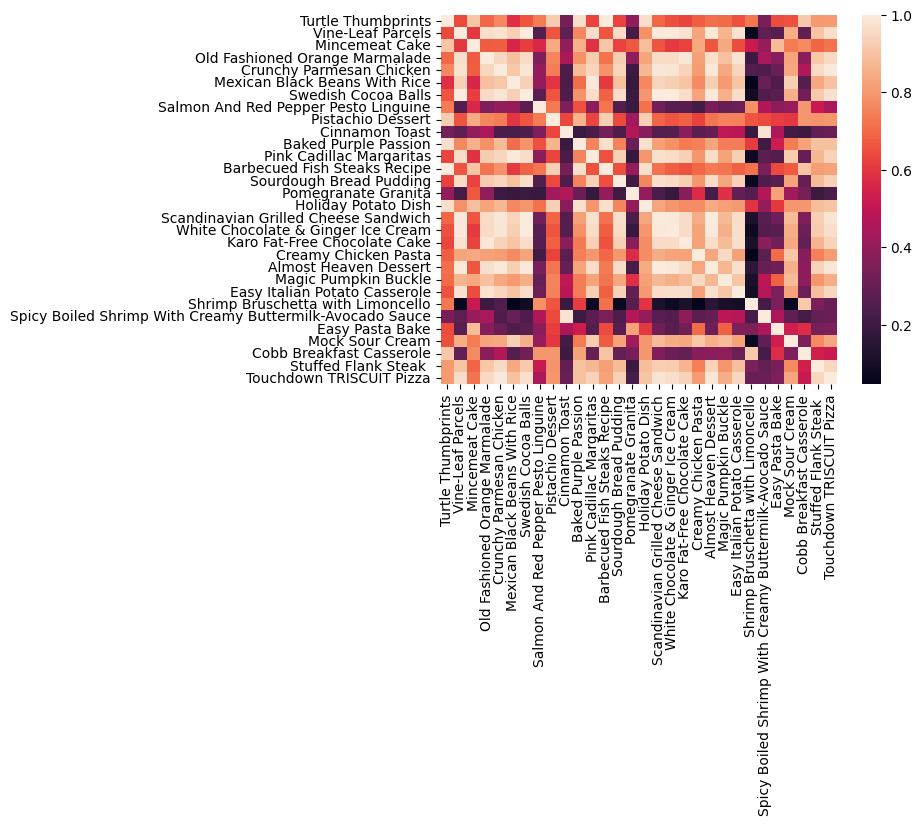

In [ ]:
recipe_similarity_matrix = cosine_similarity(recipe_concentrations_df.head(30))
sns.heatmap(recipe_similarity_matrix, xticklabels=recipe_df['title'].head(30), yticklabels=recipe_df['title'].head(30))

Again we are seeing some resemblance of appropriate recognition of similarities though it's still clutching at straws.

Look at the centre of this board. We see pasta, casserole, cake, and icecream all giving very high similarities between one another.

## PCA

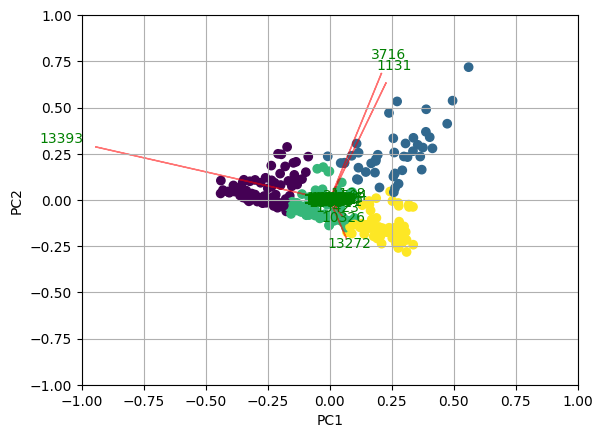

In [28]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

x = recipe_concentrations_df
y = clusters  

pca = PCA()
x_scaled = StandardScaler().fit_transform(x)
# x_new = pca.fit_transform(x_scaled)
x_pca = pca.fit_transform(x)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_pca[:,0:2],np.transpose(pca.components_[0:2, :]), recipe_concentrations_df.columns)
plt.show()

In [29]:
molecule_compound_df.loc[[3716, 1131]]

,public_id,name,moldb_iupac,state,annotation_quality,description,cas_number,moldb_inchikey,moldb_inchi,moldb_smiles,moldb_mono_mass,kingdom,superklass,klass,subklass
id,,,,,,,,,,,,,,,
3716,FDB003715,Sugars,<NA>,low,"In chemistry, sugar loosely refers to a number...",57-50-1,OC[C@H]1O[C@@](CO)(O[C@H]2O[C@H](CO)[C@@H](O)[...,InChI=1S/C12H22O11/c13-1-4-6(16)8(18)9(19)11(2...,342.116212,CZMRCDWAGMRECN-UGDNZRGBSA-N,"(2R,3R,4S,5S,6R)-2-{[(2S,3S,4S,5R)-3,4-dihydro...",<NA>,<NA>,<NA>,<NA>
1131,FDB001131,Sucrose,Solid,low,Sweetening agent and food source assimilated b...,57-50-1,OCC1OC(CO)(OC2OC(CO)C(O)C(O)C2O)C(O)C1O,InChI=1S/C12H22O11/c13-1-4-6(16)8(18)9(19)11(2...,342.116212,CZMRCDWAGMRECN-UHFFFAOYSA-N,"2-{[3,4-dihydroxy-2,5-bis(hydroxymethyl)oxolan...",Organic compounds,Organooxygen compounds,Carbohydrates and carbohydrate conjugates,Glycosyl compounds


In [30]:
molecule_content_df[molecule_content_df.index.get_level_values(1).isin([13393, 3716, 1131])]['source_name'].unique()

<StringArray>
['Sucrose', 'Sugars', 'Moisture']
Length: 3, dtype: string

A couple things can be spotter here. 

1. The clusters can easily be shown from just the PCA components.
2. The most impactful features in explaining the variance here are sugar, and moisture.

So the best features here in distinguishing between recipes are sugar, and moisture.